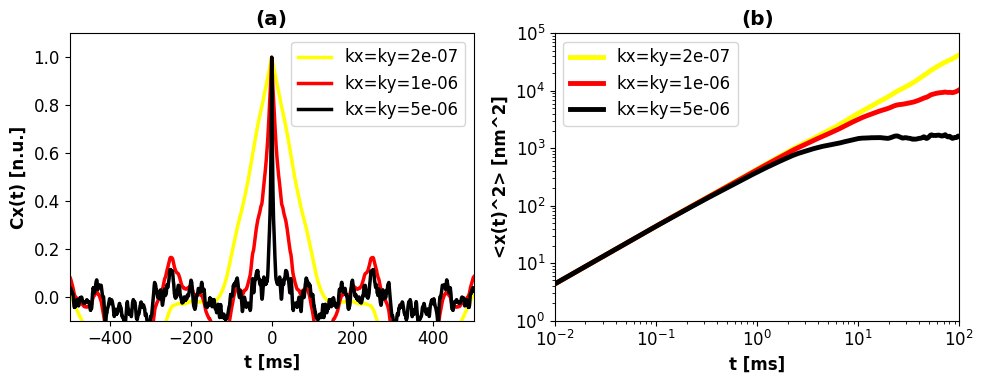

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

def trapped(N, Dt, x1, R, T, eta, a, kx, c):
    kB = 1.38e-23  # Boltzmann constant [J/K]
    gamma = 6 * np.pi * R * eta  
    D = kB * T / gamma  


    # np.random.seed(55)
    np.random.seed(888)
    x = np.zeros(N)

    t = np.arange(0, N * Dt, Dt)
    x[0] = x1 

    for i in range(1, N):
    
        x[i] = x[i-1] - (1 / gamma) * ( kx * x[i-1] ) * Dt 
        
        x[i] += np.sqrt(2 * D * Dt) * np.random.randn()

    return x, t




def acf(x, Dt):
    x = x - np.mean(x)  
    acorr = correlate(x, x, mode='full')
    acorr /= np.max(acorr)  # Normalize the peak to 1
    max_lag = len(x) - 1
    lags = np.arange(-max_lag, max_lag + 1)
    s = Dt * lags
    return acorr, s


def MSD(x, Dt, fraction=1.0):
    length = len(x)
    max_range = int(length * fraction)
    msd = np.zeros(max_range)

    for n in range(max_range):
        squared_diff = (x[n:] - x[:length - n]) ** 2
        msd[n] = np.mean(squared_diff)

    s = Dt * np.arange(len(msd))
    return msd, s


# Define the parameters
N = 100000
Dt = 1e-5
x1 = y1 = z1 = 0
R = 1e-6
T = 300
eta = 0.001
kz = 0.2e-6
kx = ky = 1e-6
a = 0
c = 0


# Call the function
x, t = trapped(N, Dt, x1, R, T, eta, a, kx, c)

# Calculate ACF and MSD
acf_result, acf_time = acf(x, Dt)
msd_result, msd_time = MSD(x, Dt)


k_values = [0.2e-6, 1e-6, 5e-6]

plt.figure(figsize=(10, 4))


plt.rcParams.update({'font.size': 12, 'legend.fontsize': 'medium'})

line_width = 2.5
colors = ['yellow', 'red', 'black']  
plt.subplot(1, 2, 1)
for i, k in enumerate(k_values):
    kx = ky = k
    x, _ = trapped(N, Dt, x1, R, T, eta, a, kx, c)
    acf_result, acf_time = acf(x, Dt)
    plt.plot(acf_time*10**(3), acf_result, label=f'kx=ky={k}', linewidth=line_width, color=colors[i])

plt.title('(a)', fontweight= "bold")
plt.xlabel('t [ms]', fontweight= "bold")
plt.ylabel('Cx(t) [n.u.]', fontweight= "bold")
plt.legend()
plt.ylim(-0.1,1.1)
plt.xlim(-500,500)

plt.subplot(1, 2, 2)
for i, k in enumerate(k_values):
    kx = ky = k
    x, _ = trapped(N, Dt, x1, R, T, eta, a, kx, c)
    msd_result, msd_time = MSD(x, Dt)
    plt.loglog(msd_time*10**(3), msd_result*10**(18), linewidth=line_width +1, label=f'kx=ky={k}', color=colors[i])

plt.title('(b)', fontweight= "bold")
plt.xlabel('t [ms]', fontweight= "bold")
plt.ylabel('<x(t)^2> [nm^2]', fontweight= "bold")
plt.legend()
plt.ylim(10**(0),10**(5))
plt.xlim(10**(-2),10**(2))

plt.tight_layout()
plt.show()

